In [1]:
import pcl
import numpy as np
import matplotlib.pyplot as plt

pclfile = "work/20180702/data/person/SAM-GOV-003/measurements/1530269720434/pc/pc_SAM-GOV-003_1530269720434_107_009.pcd"
p = pcl.load(pclfile)
parray = np.asarray(p) 

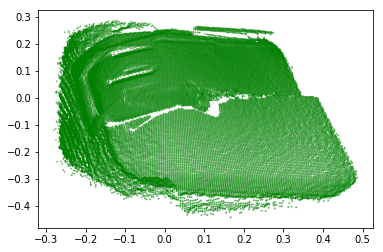

In [3]:
plt.scatter(parray[:,0], parray[:,1], parray[:,2], c="g", alpha=0.5)
plt.show()

find: paths must precede expression: table_scene_mug_stereo_textured_plane.pcd
Usage: find [-H] [-L] [-P] [-Olevel] [-D help|tree|search|stat|rates|opt|exec|time] [path...] [expression]
